In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
df = pd.read_csv('../../data/italy_earthquakes_from_2016-08-24_to_2016-11-30.csv')
df.set_index('Time', inplace=True)

In [3]:
df.dtypes

Latitude     float64
Longitude    float64
Depth/Km     float64
Magnitude    float64
dtype: object

In [4]:
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex([       '2016-08-24 03:36:32', '2016-08-24 03:37:26.580000',
               '2016-08-24 03:40:46.590000', '2016-08-24 03:41:38.900000',
               '2016-08-24 03:42:07.170000', '2016-08-24 03:43:58.700000',
               '2016-08-24 03:44:38.660000', '2016-08-24 03:44:56.400000',
               '2016-08-24 03:46:12.240000',        '2016-08-24 03:46:46',
               ...
               '2016-11-30 16:31:52.990000', '2016-11-30 17:05:07.420000',
               '2016-11-30 17:06:56.970000', '2016-11-30 17:53:02.710000',
               '2016-11-30 18:09:16.920000', '2016-11-30 18:39:27.600000',
               '2016-11-30 18:43:14.850000', '2016-11-30 20:18:27.550000',
               '2016-11-30 20:45:11.780000', '2016-11-30 20:54:35.890000'],
              dtype='datetime64[ns]', name='Time', length=8086, freq=None)

In [5]:
df.head()

,Latitude,Longitude,Depth/Km,Magnitude
Time,,,,
2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6


In [6]:
depth_magn = df.where((df['Magnitude'] >= 3.0)).dropna()[['Magnitude', 'Depth/Km']]

In [8]:
depth_magn.head()

,Magnitude,Depth/Km
Time,,
2016-08-24 03:36:32.000,6.0,8.1
2016-08-24 03:37:26.580,4.5,9.0
2016-08-24 03:40:46.590,3.8,9.7
2016-08-24 03:41:38.900,3.9,9.7
2016-08-24 03:42:07.170,3.6,9.7


In [10]:
dm = depth_magn.groupby(depth_magn.index.hour).mean()
dm.head()

,Magnitude,Depth/Km
Time,,
0,3.219048,9.071429
1,3.341667,9.720833
2,3.271429,9.457143
3,3.393478,9.556522
4,3.369811,9.173585


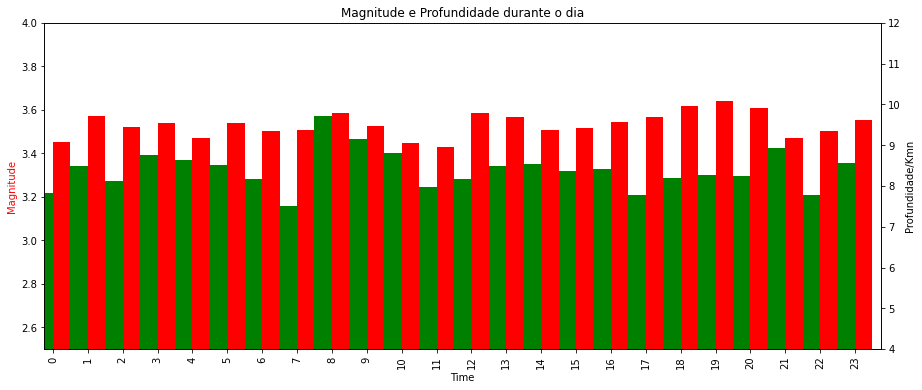

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim([2.5, 4.0])
ax.set_ylabel('Magnitude')
ax.set_xlabel('Hora do Dia')
ax.yaxis.label.set_color('green')

ax2 = ax.twinx() # cria o eixo ax2 com as mesmas características do eixo ax
ax2.set_ylim([4.0, 12])
ax2.set_ylabel('Profundidade/Kmn')
ax2.set_xlabel('Hora do Dia')
ax.yaxis.label.set_color('red')

width = 0.5

dm['Magnitude'].plot(kind='bar', color='green', ax=ax, width=width, position=1)
dm['Depth/Km'].plot(kind='bar', color='red', ax=ax2, width=width, position=0)
plt.grid(False)
plt.title('Magnitude e Profundidade durante o dia');